# Lê Văn Hiếu
# MSSV: 17103271
# Thực hành môn xử lý ảnh
# LAB 10

### Import Libraries:

In [114]:
import pandas
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Convolution function Implement:

In [130]:
def conv(A, Mask):
    res = A
    for i in range(len(A)):
        for j in range(len(A[i])):
            x = 0
            for i1 in range(-1,2):
                for j1 in range(-1,2):
                    if (i+i1>=0 and i+i1<len(A) and j+j1>=0 and j+j1<len(A[i])):
                        x+=A[i+i1][j+j1]*Mask[i1+1][j1+1]
            res[i][j] = (x)
    return res

In [152]:
mask = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])


### Read image into img

In [176]:
img = cv2.imread('../images/Lab10_images2/Lab10_1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'Original Image')

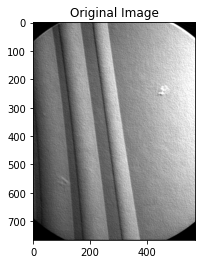

In [177]:
plt.imshow(img,cmap='gray')
plt.title('Original Image')

In [153]:
imgCvt = conv(img, mask)

In [174]:
ma = np.max(np.abs(imgCvt))
# it = imgCvt[]
it = imgCvt >= ma
np.unique(it)

array([False,  True])

Text(0.5, 1.0, 'Result of Point Detection')

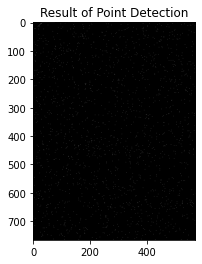

In [178]:
plt.imshow(it, cmap='gray')
plt.title('Result of Point Detection')

## Edge Detection:

Text(0.5, 1.0, 'Original Image')

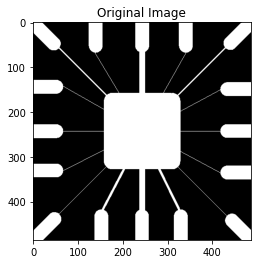

In [242]:
img2 = cv2.imread('../images/Lab10_images2/Lab10_2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap = 'gray')
plt.title('Original Image')

### Line Detection: 

In [217]:
mask_Horizontal = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])
mask_add45 = np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]])
mask_substract45 = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])
mask_Vertical = np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]])

horizontal = cv2.filter2D(img2,-1,mask_Horizontal)
add45 = cv2.filter2D(img2,-1,mask_add45)
substract45 = cv2.filter2D(img2,-1,mask_substract45)
Vertical = cv2.filter2D(img2,-1,mask_Vertical)

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

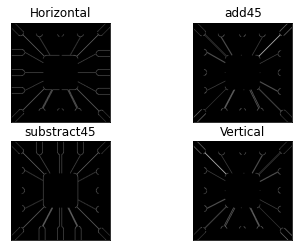

In [218]:
plt.subplot(221),
plt.imshow(horizontal, cmap='gray'),
plt.title('Horizontal')
plt.xticks([]), plt.yticks([])
    
plt.subplot(222),
plt.imshow(add45, cmap='gray'),
plt.title('add45')
plt.xticks([]), plt.yticks([])
    
plt.subplot(223),
plt.imshow(substract45, cmap='gray'),
plt.title('substract45')
plt.xticks([]), plt.yticks([])
    
plt.subplot(224),
plt.imshow(Vertical, cmap='gray'),
plt.title('Vertical')
plt.xticks([]), plt.yticks([])

### Edge Detection using Function Edge:

In [247]:
img3 = cv2.imread('../images/Lab10_images2/Lab10_3.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
# plt.imshow(img3, cmap='gray')

#### Prewit:

In [248]:
prewit1 = np.array([[0,1,1],[-1,0,1],[-1,-1,0]])
prewit2 = np.array([[-1,-1,0],[1,0,-1],[0,1,1]])
P1 = cv2.filter2D(img3, -1, prewit1)
P2 = cv2.filter2D(img3, -1, prewit2)
P = (P1**2 + P2**2)**(1/2)
# P = P1 + P2

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

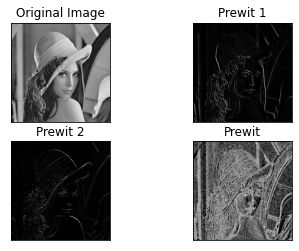

In [249]:
plt.subplot(221),
plt.imshow(img3, cmap='gray'),
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
    
plt.subplot(222),
plt.imshow(P1, cmap='gray'),
plt.title('Prewit 1')
plt.xticks([]), plt.yticks([])
    
plt.subplot(223),
plt.imshow(P2, cmap='gray'),
plt.title('Prewit 2')
plt.xticks([]), plt.yticks([])
    
plt.subplot(224),
plt.imshow(P, cmap='gray'),
plt.title('Prewit')
plt.xticks([]), plt.yticks([])

#### Sobel:

In [250]:
sobelX = np.array([[0,1,2],[-1,0,1],[-2,-1,0]])
sobelY = np.array([[-2,-1,0],[1,0,-1],[0,1,2]])
S1 = cv2.filter2D(img3, -1, sobelX)
S2 = cv2.filter2D(img3, -1, sobelY)
S = (S1**2 + S2**2)**(1/2)

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

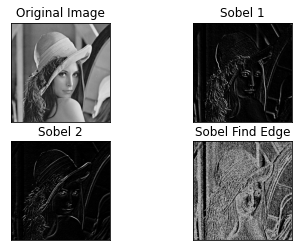

In [251]:
plt.subplot(221),
plt.imshow(img3, cmap='gray'),
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
    
plt.subplot(222),
plt.imshow(S1, cmap='gray'),
plt.title('Sobel 1')
plt.xticks([]), plt.yticks([])
    
plt.subplot(223),
plt.imshow(S2, cmap='gray'),
plt.title('Sobel 2')
plt.xticks([]), plt.yticks([])
    
plt.subplot(224),
plt.imshow(S, cmap='gray'),
plt.title('Sobel Find Edge')
plt.xticks([]), plt.yticks([])

## Detecting a Cell Using Image Segmentation:

Text(0.5, 1.0, 'Original Image')

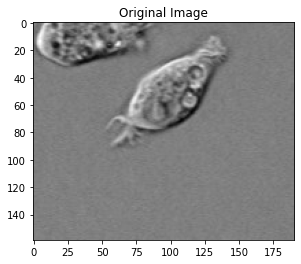

In [254]:
I = cv2.imread('../images/Lab10_images2/Lab10_5.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plt.imshow(I, cmap = 'gray')
plt.title('Original Image')

### Binary gradient mask using SOBEL:

In [332]:
def fill_holes(im_in):

    # Copy the thresholded image.
    im_floodfill = im_in.copy()

    # Mask used to flood filling.
    # Notice the size needs to be 2 pixels than the image.
    h, w = im_in.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask, (h-,w-1), 255);

    # Invert floodfilled image
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.
    im_out = im_in.astype(np.int) | im_floodfill_inv.astype(np.int)

    return im_out 

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

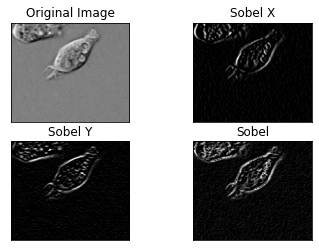

In [257]:
# sobelXX = np.array([[0,1,2],[-1,0,1],[-2,-1,0]])
# sobelYY = np.array([[-2,-1,0],[1,0,-1],[0,1,2]])
sobelXX = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobelYY = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

G1 = cv2.filter2D(I, -1, sobelXX)
G2 = cv2.filter2D(I, -1, sobelYY)
# G = (G1**2 + G2**2)**(1/2)
G = G1 + G2

plt.subplot(221),
plt.imshow(I, cmap='gray'),
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
    
plt.subplot(222),
plt.imshow(G1, cmap='gray'),
plt.title('Sobel X')
plt.xticks([]), plt.yticks([])
    
plt.subplot(223),
plt.imshow(G2, cmap='gray'),
plt.title('Sobel Y')
plt.xticks([]), plt.yticks([])
    
plt.subplot(224),
plt.imshow(G, cmap='gray'),
plt.title('Sobel')
plt.xticks([]), plt.yticks([])

In [260]:
kernel = np.ones((5,5), np.uint8)

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

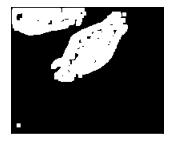

In [299]:
I_dilation = cv2.dilate(G, kernel, iterations=1) 
    
plt.subplot(121),
plt.imshow(I_dilation>50, cmap='gray')
plt.xticks([]), plt.yticks([])

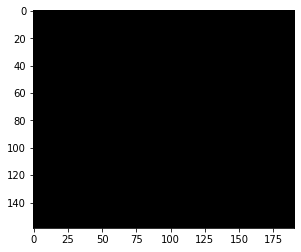

In [333]:
I_fill = fill_holes(I_dilation)
plt.imshow(I_fill, cmap='gray')